# Lab 3

Lab 3 centers on the photometric analysis of a short-period Cepheid variable star using a sequence of exposures in different filters, as well as associated calibration data.

As before, this notebook will first illustrate some Python features.

In [787]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import pylab
import sys; sys.path.append('/home/a180i/lib/python/')
import a180

## Python Features

### Tuple assignment

We normally assign values to a variable one at a time, like
~~~
a = 10
~~~
However, we can do more than one assignment at a time using tuples.  We could assign a tuple to the variable `a` like this:
~~~
a = (5, 3)
~~~
The variable `a` is now a tuple.  But what if we didn't want a tuple variable, what if we wanted two variables, `c` and `d` to have these two values?  We could do
~~~
c = 5
d = 3
~~~
to assign them.  But using tuples, we can do it faster:

In [788]:
c, d = (5, 3)  # tuple-based assignment
print(c,d)
c, d = 5, 3  # even less typing, since the tuple is implied
print(c,d)

5 3
5 3


### Defining functions

Sometimes we want to make our own functions.  Usually this occurs when we want to repeat a set of operations on a different set of variables.  (Note that when we want to repeat an operation on different values of variables, often we use loops.)

It is straightforward to create our own functions in Python.

In [789]:
def myfunction(input1, input2):
    "my own function has a string to tell us what it does."
    output = input1 + input2
    return output
print(myfunction(2, 2))
print(myfunction(25490.2325, 09538294035.11))

def myotherfunction(input1, input2):
    "this one is more complicated.  we have two outputs"
    output1 = input1+input2
    output2 = input1*input2
    return output1, output2
out1, out2 = myotherfunction(2,3)
print(out1, out2)

4
9538319525.3425
5 6


### Functions with keyword arguments

Sometimes we can have optional parameters, where we can change the behavior of a function with that parameter, or have a default value for an input.  These are done with keywords arguments in Python.

In [790]:
def anotherfunction(input1, optional_input=10):  # notice the syntax of the keyword argument.  We use an equals sign, and give the default value for when the function is called and the keyword is not present
    return input1+optional_input
print(anotherfunction(1))  # this function call will assume the default value for the keyword argument
print(anotherfunction(1, optional_input=2))  # notice how we call a function and specify the keyword

11
3


### Overlaying a circle on an image

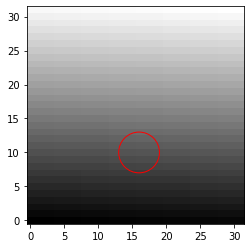

In [791]:
im = np.arange(32*32).reshape(32,32)  # some sample data to display as an image

# set up the figure
fig = pylab.figure()
ax = fig.add_subplot(111)

# show the image as grayscale
ax.imshow(im, cmap=mpl.cm.gray)

# overlay a circle
ax.add_patch(mpl.patches.Circle((16,10), # center of the circle (x,y)
                                radius=3., # radius of the circle
                                ec='r', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))

# finalize the figure
pylab.draw()
pylab.show()

### Using +-, -=, *=, /= operators

Sometimes we want to modify a variable in place.  We might be tempted to do something like
~~~
x = x + 2
y = 3*y
~~~
But there are special operators which can simplify this for us, the `+=`, `-=`, `*=`, and `/=` operators do in-place addition, subtraction, multiplication, and division.

In [792]:
w, x, y, z = 1, 2, 3, 4  # multiple variable assignment
print(w, x, y, z)
w += 1
x -= 1
y *= 2
z /= 2
print(w, x, y, z)

1 2 3 4
2 1 6 2.0


### Plots with error bars

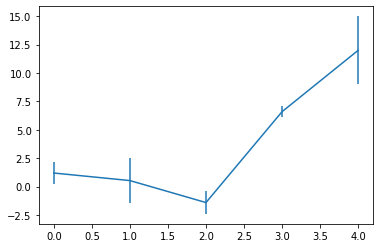

In [793]:
# define some data
x = np.arange(5)
y = [1.2, .535, -1.4, 6.6, 12.]
y_err = [1., 2., 1., 0.5, 3.]

# set up the plot
fig = pylab.figure()
ax = fig.add_subplot(111)

# plot the data with errors
ax.errorbar(x, y, y_err)

# finalize the plot
pylab.show()

### Flipping the y axis of a plot

Sometimes we want to flip a $y$ axis, such as when plotting magnitudes (so bright things are higher in a graph).

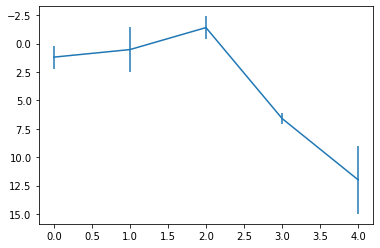

In [794]:
# set up the plot
fig = pylab.figure()
ax = fig.add_subplot(111)

# plot something
ax.errorbar(x, y, y_err)

# flip the y axes
ax.invert_yaxis()

# finalize the plot
pylab.show()

### Interpolation

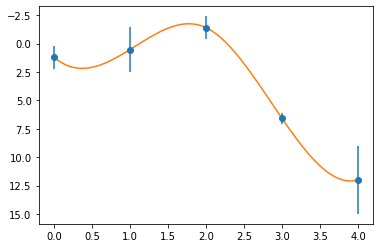

In [795]:
# get interpolation function
from scipy.interpolate import interp1d
yinterp_fn = interp1d(x, y, kind='cubic', bounds_error=False) # returns a function that, when evalued, gives interpolated values

# get values at which to interpolate
xint = np.linspace(0., 5., 100) # xmin, xmax, nx

# get interpolated values
yint = yinterp_fn(xint)

# set up the figure
fig = pylab.figure()
ax = fig.add_subplot(111)

# plot something
ax.errorbar(x, y, y_err, fmt='o')

# plot interpolated values
ax.plot(xint, yint)

# flip the y axes
ax.invert_yaxis()

# finalize the plot
pylab.show()

## Photometric Analysis of a Cepheid Variable Star

Let's get organized first, and specify our file locations.

We can't save our processed data in the raw data directory; we must specify a different location.  If it doesn't exist, we need to make it first.  You can do this from within Jupyter.  Suppose you want to make a directory called `foo`.  You would open a Terminal and type `mkdir foo`.

In [796]:
raw_data_dir = '/data/2023-Spring/20230512/' # directory where raw data are stored
proc_data_dir = '/data/home/a180u/processed/'# place to store our processed data.  Make sure this exists!

# dark frames corresponding to the flats
raw_dark_files = ['dark1_001.FIT',
                  'dark1_002.FIT',
                  'dark1_003.FIT',
                  'dark1_004.FIT',
                  'dark1_005.FIT'
                 ]

# flat fields in V and R band
raw_flatV_files = ['flat1.FIT',
                   'flat2.FIT',
                   'flat3.FIT',
                   'flat4.FIT',
                   'flat5.FIT'
                  ]
raw_flatR_files = ['flat1R.FIT',
                   'flat2R.FIT',
                   'FLATR_001.FIT',
                   'FLATR_002.FIT',
                   'FLATR_003.FIT'
                  ]

# sky images in V and R band
raw_skyV_files = ['bcgd1V_001.FIT',
                  'bcgd1V_002.FIT',
                  'bcgd2V_001.FIT',
                  'bcgd2V_002.FIT'
                 ]
raw_skyR_files = ['bcgd1R_001.FIT',
                  'bcgd1R_002.FIT',
                  'bcgd2R_001.FIT',
                  'bcgd2R_002.FIT'
                 ]

# science target observations in V and R band
raw_targV_files = ['target1V_001.FIT', 'target1V_002.FIT',
                   'target2V_001.FIT', 'target2V_002.FIT',
                   'target3V_001.FIT', 'target3V_002.FIT',
                   'target4V_001.FIT',
                   'target5V_001.FIT', 'target5V_002.FIT',
                   'target6V_001.FIT', 'target6V_002.FIT',
                   'target7V_001.FIT', 'target7V_002.FIT',
                   'target8V_001.FIT', 'target8V_002.FIT',
                   'target9V_001.FIT', 'target9V_002.FIT',
                   'target10V_001.FIT',
                   'target11V_001.FIT',
                   'target13V_001.FIT', 'target13V_002.FIT',
                   'target14V_001.FIT', 'target14V_002.FIT',
                   'target15V_001.FIT', 'target15V_002.FIT',
                   'target16V_001.FIT', 'target16V_002.FIT'
                  ]
raw_targR_files = ['target1R_001.FIT', 'target1R_002.FIT',
                   'target2R_001.FIT', 'target2R_002.FIT',
                   'target3R_001.FIT', 'target3R_002.FIT',
                   'target4V_001.FIT',
                   'target5R_001.FIT', 'target5R_002.FIT',
                   'target6R_001.FIT', 'target6R_002.FIT',
                   'target7R_001.FIT', 'target7R_002.FIT',
                   'target8R_001.FIT', 'target8R_002.FIT',
                   'target9R_001.FIT', 'target9R_002.FIT',
                   'target10R_001.FIT',
                   'target11R_001.FIT',
                   'target13R_001.FIT', 'target13R_002.FIT',
                   'target14R_001.FIT', 'target14R_002.FIT',
                   'target15R_001.FIT', 'target15R_002.FIT',
                   'target16R_001.FIT', 'target16R_002.FIT'
                  ]


# skies for the photometric standard stars 
raw_photskyV_files = ['flat1.FIT',
                      'flat2.FIT',
                      'flat3.FIT',
                      'flat4.FIT',
                      'flat5.FIT'
                     ]

raw_photskyR_files = ['flat1R.FIT',
                      'flat2R.FIT',
                      'FLATR_001.FIT',
                      'FLATR_002.FIT',
                      'FLATR_003.FIT'
                     ]

# observations of the photometric standard star (Landolt standard)
raw_photV_files = ['phstd1V_001.FIT',
                   'phstd1V_002.FIT'
                  ]

raw_photR_files = ['phstd1R_001.FIT',
                   'phstd1R_002.FIT'
                  ]

### Calibrating the data

We'll need to calibrate our data.  For our target star images, we'll need to subtract out the background light using our sky exposures, as well as divide by the response function (the "flat field").

#### Creating the flat fields in each band

For each band ($V$ and $R$), we must first construct the flat field; this is done by removing the expected bias and dark current levels.

We're going to be loading and combining files fiarly often in our calibrations, so lets define a load and combine function.  We'll use median combination rather than averaging since it is more robust to errors that come from cosmic rays.

Let's first apply it to the dark exposure.

In [797]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

def load_and_combine(filenames, prefix=''):
    "Load and use median combination on a list of exposures.  Returns a numpy array."
    images = [] # define an empty list
    for fn in filenames:
        images.append(fits.getdata(prefix+fn)) # populate the list with image arrays from each file
    images = np.array(images) # turn the list into a 3d numpy array
    combined_im = np.median(images, axis=0) # use median combination along the first axis (image index)
    return combined_im

# process dark
dark_im = load_and_combine(raw_dark_files, prefix=raw_data_dir) # load and combine dark exposures into a dark frame
dark_fn = 'dark.fits' # filename for our combined dark frame
fits.writeto(proc_data_dir+dark_fn, dark_im, overwrite=True) # store the combined dark frame in a FITS file

Now that we have a dark exposure, we can create the flat fields.

In a given band, we will load and combine the flat field exposures.  We will subtract out the dark frame, and then normalize by the median value so that the flat field frame represents a relative response level.  We can then save it to file.

In [798]:
# create V-band flat field
V_flat_im = load_and_combine(raw_flatV_files, prefix=raw_data_dir)
V_flat_im = V_flat_im - dark_im
V_flat_im /= np.median(V_flat_im)
V_flat_fn = 'v_flat.fits'
fits.writeto(proc_data_dir+V_flat_fn, V_flat_im, overwrite=True)

# create R-band flat field
R_flat_im = load_and_combine(raw_flatR_files, prefix=raw_data_dir)
R_flat_im = R_flat_im - dark_im
R_flat_im /= np.median(R_flat_im)
R_flat_fn = 'r_flat.fits'
fits.writeto(proc_data_dir+R_flat_fn, R_flat_im, overwrite=True)

#### Processing sky exposures

We won't have to do anything fancy to the sky background exposures, just load them and combine them for each set.

In [799]:
# process and store sky exposures for target, V band
V_sky_im = load_and_combine(raw_skyV_files, prefix=raw_data_dir)
V_sky_fn = 'v_sky.fits'
fits.writeto(proc_data_dir+V_sky_fn, V_sky_im, overwrite=True)

# process and store sky exposures for target, R band
R_sky_im = load_and_combine(raw_skyR_files, prefix=raw_data_dir)
R_sky_fn = 'r_sky.fits'
fits.writeto(proc_data_dir+R_sky_fn, R_sky_im, overwrite=True)

# process and store sky exposures for photometric standard, V band
V_photsky_im = load_and_combine(raw_photskyV_files, prefix=raw_data_dir)
V_photsky_fn = 'v_photsky.fits'
fits.writeto(proc_data_dir+V_photsky_fn, V_photsky_im, overwrite=True)

# process and store sky exposures for photometric standard, R band
R_photsky_im = load_and_combine(raw_photskyR_files, prefix=raw_data_dir)
R_photsky_fn = 'r_photsky.fits'
fits.writeto(proc_data_dir+R_photsky_fn, R_photsky_im, overwrite=True)

#### Calibrating photometric exposures

We have several data sets we need to calibrate, namely our target and photometric standard star exposures in each filter band.

To do this, we'll load each exposure, subtract the sky background, and divide by the flat field response.  We'll store the output as a file.  Let's try to simplify the process by writing a function.

In [800]:
def process_photometry(raw_filename, sky_im, flat_im, raw_dir='', out_dir='', prefix='proc-'):
    "Calibriate a photometric exposure"
    out_fn = prefix + raw_filename   # output filename
    im = fits.getdata(raw_dir + raw_filename)   # load the input data
    proc_im = (im - sky_im) / flat_im # calibration steps
    fits.writeto(out_dir+out_fn, proc_im, overwrite=True)  # store the output
    return out_fn  # return the processed image filename

# process photometric standard exposures, V band
proc_photV_files = []
for file in raw_photV_files:
    proc_photV_files.append(process_photometry(file, V_sky_im, V_flat_im, raw_dir=raw_data_dir, out_dir=proc_data_dir))

# process photometric standard exposures, R band
proc_photR_files = []
for file in raw_photR_files:
    proc_photR_files.append(process_photometry(file, V_sky_im, V_flat_im, raw_dir=raw_data_dir, out_dir=proc_data_dir))

# process target star exposures, V band
proc_targV_files = []
for file in raw_targV_files:
    proc_targV_files.append(process_photometry(file, V_sky_im, V_flat_im, raw_dir=raw_data_dir, out_dir=proc_data_dir))

# process target star exposures, R band
proc_targR_files = []
for file in raw_targR_files:
    proc_targR_files.append(process_photometry(file, V_sky_im, V_flat_im, raw_dir=raw_data_dir, out_dir=proc_data_dir))
    

/tmp/ipykernel_1962840/3294148609.py:5: RuntimeWarning: divide by zero encountered in true_divide
  proc_im = (im - sky_im) / flat_im # calibration steps


Now all our data have had the first level of calibration performed, and we're ready to start making photometric measurements.

### Getting uncalibrated photometry

We need to add up the light from our measurements.  This will give us uncalibrated photometry, in units of DN/s.

To do this we'll define an "aperture," which is a virtual region in the image over which we'll add up the counts.  This will be a circular aperture centered on the star.

We also expect that our sky background subtraction is not perfect, so we'll define a "sky annulus," a ring-like region outside of our photometric aperture over which the residual sky level will be determiend and subtracted from our target aperture.

So we'll need to find:
* star center in pixel coordinates
* radius of the photometric aperture
* inner and outer radii of the sky annulus

To simplify the analysis, we'll use the same aperture parameters on all exposures.  That way we only have to find the stellar centers in each exposure.

Let's start with an example exposure.

#### Example exposure photometry

Let's load and display an example exposure.  We'll overlay the photometric and sky annulus apertures on the image to check consistency, and we'll get the photometric measurement.

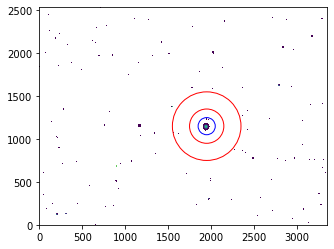

In [801]:
# first some definitions
proc_targ_im_fn = proc_data_dir+'proc-target14V_002.FIT'  # filename for processed example target exposure
t_exp = 60  # [s] exposure time
x, y = 1950, 1150 # [pix], [pix]  stellar x and y postiions
phot_rad = 100  # [pix] photometric aperture radius
sky_ann_inner_rad = 200  # [pix] sky annulus inner radius
sky_ann_outer_rad = 400  # [pix] sky annulus outer radius

# load the target image
im = fits.getdata(proc_targ_im_fn)

# create a figure
fig = pylab.figure()
ax = fig.add_subplot(111)

# display the image
ax.imshow(im, norm=LogNorm(vmin=100, vmax=1500))

# overlay a circle for the photometric aperture
ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
                                radius=phot_rad, # radius of the circle
                                ec='b', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))

# overlay a circle for the sky annulus inner radius
ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
                                radius=sky_ann_inner_rad, # radius of the circle
                                ec='r', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))

# overlay a circle for the sky annulus outer radius
ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
                                radius=sky_ann_outer_rad, # radius of the circle
                                ec='r', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))


# show the figure
pylab.draw()

We should be sure the apertures are centered on the star.

The ideal size for the photometric aperture is roughly to have it as large as possible without being so big as being dominated by sky background noise.  So we should have it sized so that it encompasses the majority of the visible starlight.

Note that since we are using the same aperture sizes for all exposures, it won't be optimal in all cases.  We're aiming for "good enough" here.

The sky annulus inner radius should be large enough so that no signal from the star is in the sky annulus.  The outer radius should be large enough so that a good number of pixels are included (ideally more area in the sky annulus than the target aperture), but not so large that systematic errors from sky nonuniformity creep in.  There is no grea recipe for the sky annulus; just get something good enough.

Once we have our aperture set, let's do the photometry.

In [802]:
from a180 import ap_phot

data, hdr = fits.getdata(raw_data_dir+'/target14V_001.FIT', header=True)

gain = hdr['EGAIN']  # [e-/DN] gain of image sensor

phot, phot_err = ap_phot(im, x, y, 
                         phot_rad, 
                         sky_in=sky_ann_inner_rad, 
                         sky_out=sky_ann_outer_rad, 
                         gain=gain)  # get the aperture photometry
phot /= t_exp  # [DN] -> [DN/s]
phot_err /= t_exp  # [DN] -> [DN/s]

print(phot, phot_err)

14436.946008905448 421.7859137769994


#### Positions for all star exposures

We need to get the star position for all of our exposures.  The simplest way is through visual inspection.

In [803]:
# define xy positions for target V-band exposures
targV_xys = [
             (1925, 1395), (1925, 1395), #1
             (1920, 1400), (1925, 1395), #2
             (1910, 1515), (1910, 1512), #3
             (1920, 1510), #4
             (1770, 1430), (1760, 1440), #5
             (1770, 1430), (1770, 1430), #6
             (1840, 1160), (1840, 1160), #7
             (1845, 1140), (1840, 1130), #8
             (2120, 1180), (2120, 1180), #9
             (2140, 1160), #10
             (1800, 1310), #11
             (1930, 1170), (1925, 1180), #13
             (1935, 1160), (1935, 1150), #14
             (1440, 1000), (1440, 1005), #15
             (1450, 995), (1455, 980) #16
            ]

# define xy positions for target R-band exposures
targR_xys = [
            (1925, 1395), (1925, 1395), #1
            (1925, 1395), (1925, 1395), #2
            (1915, 1525), (1915, 1500), #3
            (1915, 1500), #4
            (1770, 1430), (1770, 1430), #5
            (1775, 1420), (1775, 1420), #6
            (1840, 1150), (1840, 1160), #7
            (1840, 1150), (1850, 1130), #8
            (1850, 1130), (1850, 1130), #9    
            (1850, 1130), #10
            (1850, 1130), #11
            (1930, 1165), (1930, 1165), #13
            (1940, 1150), (1940, 1145), #14
            (1450, 1000), (1450, 995), #15
            (1470, 975), (1465, 975) #16
            ]

# define xy positions for standard V-band exposures
stdV_xys = [(1300, 1120), (1300, 1100)]

# define xy positions for standard R-band exposures
stdR_xys = [(1310, 1090), (1310, 1080)]


(31, 1203)


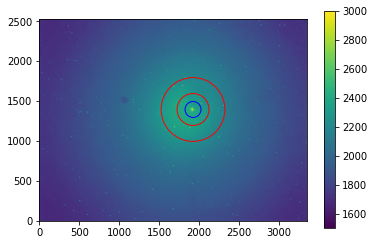

In [804]:
# use this to find where the target is, since we dithered

from matplotlib.colors import LogNorm
from numpy import unravel_index

x, y = (1925, 1395)

fig, ax = plt.subplots()
im = fits.getdata(raw_data_dir+'target1R_001.FIT')
# im = fits.getdata(proc_data_dir+'proc-target4R_002.FIT')
plt.imshow(im, vmin=1500, vmax=3000)
print(unravel_index(im.argmax(), im.shape))
# overlay a circle for the photometric aperture
ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
                                radius=phot_rad, # radius of the circle
                                ec='b', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))

# overlay a circle for the sky annulus inner radius
ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
                                radius=sky_ann_inner_rad, # radius of the circle
                                ec='r', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))

# overlay a circle for the sky annulus outer radius
ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
                                radius=sky_ann_outer_rad, # radius of the circle
                                ec='r', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))

plt.colorbar()
plt.show()

#### Photometry for all exposures

Let's loop and get photometric measurements for all exposures.  Try writing a function to loop over an exposure sequence, and return numpy arrays of the photometry and photometric error, each in DN/s.

In [805]:
def photometry(raw_seq, proc_seq, xys, raw_dir = '', proc_dir='', t = 60):
    
    F = []
    F_err = []
    
    for i in range(len(proc_seq)):
        
        data1, hdr1 = fits.getdata(raw_dir+raw_seq[i], header=True)
        data2, hdr2 = fits.getdata(proc_dir+proc_seq[i], header=True)
        
        gain = hdr1['EGAIN']
        
        phot, phot_err = ap_phot(data2, xys[i][0], xys[i][1], 
                         phot_rad, 
                         sky_in=sky_ann_inner_rad, 
                         sky_out=sky_ann_outer_rad, 
                         gain=gain)  # get the aperture photometry
        F.append(phot)
        F_err.append(phot_err)
     
    F, F_err = np.array(F), np.array(F_err)
    
    F /= t  # [DN] -> [DN/s]
    F_err /= t  # [DN] -> [DN/s]

    return F, F_err

F_V_targ, F_V_targ_err = photometry(raw_targV_files, proc_targV_files, targV_xys, raw_dir = raw_data_dir, proc_dir=proc_data_dir)
F_R_targ, F_R_targ_err = photometry(raw_targR_files, proc_targR_files, targR_xys, raw_dir = raw_data_dir, proc_dir=proc_data_dir)
F_V_std, F_V_std_err = photometry(raw_photV_files, proc_photV_files, stdV_xys, raw_dir = raw_data_dir, proc_dir=proc_data_dir)
F_R_std, F_R_std_err = photometry(raw_photR_files, proc_photR_files, stdR_xys, raw_dir = raw_data_dir, proc_dir=proc_data_dir)


#### Plotting the raw photometry vs. time

Let's do a quick check and examine our photometry (and errors) vs. time in each band.

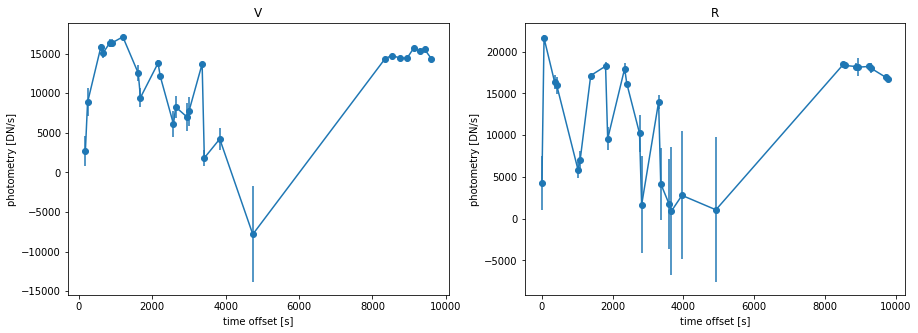

In [806]:
# target time offsets in V band
t_offs_V = np.array([
             3, 4, #1
             10, 11, #2
             14, 15, #3
             20, #4
             27, 28, #5
             36, 37, #6
             43, 44, #7
             49, 50, #8
             56, 57, #9
             64, #10
             79, #11
             139, 142, #13
             146, 149, #14
             152, 155, #15
             157, 160 #16
            ])*60
# target time offsets in R band
t_offs_R = np.array([
            0, 1, #1
            6, 7, #2
            17, 18, #3
            23, #4
            30, 31, #5
            39, 40, #6
            46, 47, #7
            55, 56, #8
            60, 61, #9    
            66, #10
            82, #11
            142, 143, #13
            148, 149, #14
            154, 155, #15
            162, 163 #16
            ])*60

# set up figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121) # one row, two columns, first subplot
ax2 = fig.add_subplot(122) # one row, two columns, second subplot

# plot V band
ax1.errorbar(t_offs_V, F_V_targ, F_V_targ_err, marker='o')
ax1.set_title('V')
ax1.set_xlabel('time offset [s]')
ax1.set_ylabel('photometry [DN/s]')

# plot R band
ax2.errorbar(t_offs_R, F_R_targ, F_R_targ_err, marker='o')
ax2.set_title('R')
ax2.set_xlabel('time offset [s]')
ax2.set_ylabel('photometry [DN/s]')


# finalize plot
pylab.draw()

#### Calibrating the photometry

We'll use the standard star photometry and its known magnitudes in each filter to calibrate our starget star photometry and put it into magnitude units.

Let's first get an average DN/s level for our standard star in each band, along with an uncertainty.  

In [807]:
F0_V, F0_V_err = photometry(raw_photV_files, proc_photV_files, stdV_xys, raw_dir = raw_data_dir, proc_dir=proc_data_dir)  # [DN/s]
F0_V, F0_V_err = np.mean(F0_V), np.mean(F0_V_err)
F0_R, F0_R_err = photometry(raw_photR_files, proc_photR_files, stdR_xys, raw_dir = raw_data_dir, proc_dir=proc_data_dir)  # [DN/s]
F0_R, F0_R_err = np.mean(F0_R), np.mean(F0_R_err)


Now we'll use this observed flux level and the known magnitude to get a zero point (and associated uncertainty).

In [808]:
m0_V = 12.636 + 2.5*np.log10(F0_V)  # [mag]
m0_V_err = 2.5/np.log(10)*F0_V_err/F0_V  # [mag]
m0_R = 12.636-1.185 + 2.5*np.log10(F0_R)  # [mag]
m0_R_err = 2.5/np.log(10)*F0_R_err/F0_R  # [mag]

Finally we can use these to calibrate our target star photometry.

In [809]:
# calibrated target star V-band photometry [mag] with uncertainty
m_V = m0_V - 2.5*np.log10(np.abs(F_V_targ))
m_V_err = m0_V_err + 2.5/np.log(10)*F_V_targ_err/F_V_targ

# calibrated target star R-band photometry [mag] with uncertainty
m_R = m0_R - 2.5*np.log10(np.abs(F_R_targ/F0_R))
m_R_err = m0_R_err + 2.5/np.log(10)*F_R_targ_err/F_R_targ

#### Plotting the calibrated photometry

We'll want to plot our photometry (and errors) vs. time.

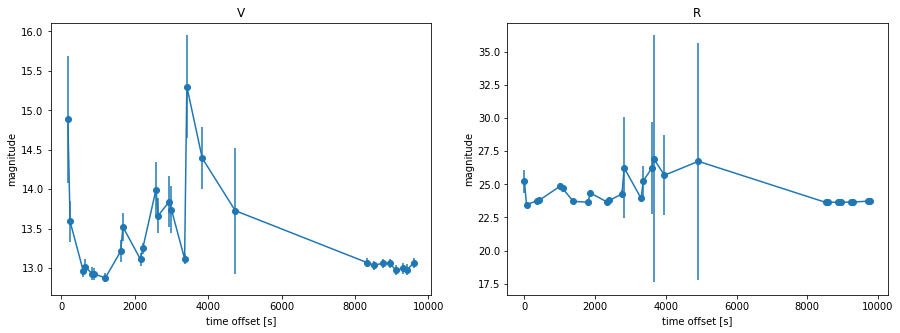

In [810]:
# set up figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121) # one row, two columns, first subplot
ax2 = fig.add_subplot(122) # one row, two columns, second subplot

# plot V band
ax1.errorbar(t_offs_V, m_V, m_V_err, marker='o')
ax1.set_title('V')
ax1.set_xlabel('time offset [s]')
ax1.set_ylabel('magnitude')

# plot R band
ax2.errorbar(t_offs_R, m_R, m_R_err, marker='o')
ax2.set_title('R')
ax2.set_xlabel('time offset [s]')
ax2.set_ylabel('magnitude')

plt.show()

#### Computing a color

We'll want to look at $V-R$ color vs. time as well.  One complication is that we don't have the same timestamps for our $V$ and $R$ exposures, so we can't just subtract them.

We can get a sense of the color change by interpolating the time sequences.


In [811]:
# interpolate the time series data
from scipy.interpolate import interp1d
interp_mR_func = interp1d(t_offs_R, m_R, kind='cubic', bounds_error=False)
interp_mR = interp_mR_func(np.linspace(min(t_offs_V), max(t_offs_V), 200)) # interpolated magnitudes at V-band time locations

interp_mV_func = interp1d(t_offs_V, m_V, kind='cubic', bounds_error=False)
interp_mV = interp_mV_func(np.linspace(min(t_offs_V), max(t_offs_V), 200)) # interpolated magnitudes at V-band time locations

# compute the V-R color (magnitudes)
v_minus_r = m_V - m_R

# estimate the uncertainties for the color
v_minus_r_error = m_V_err + m_R_err

#### Plotting the color
Let's see the results.

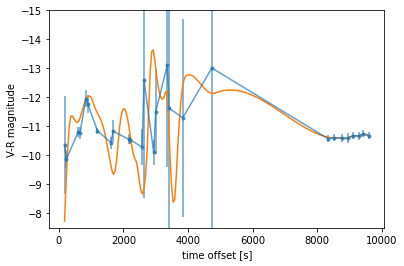

In [812]:
plt.errorbar(t_offs_V, v_minus_r, v_minus_r_error, marker='.', alpha=0.7)
plt.plot(np.linspace(min(t_offs_V), max(t_offs_V), 200), interp_mV-interp_mR)
plt.xlabel('time offset [s]')
plt.ylabel('V-R magnitude')
plt.ylim(-7.5, -15)
plt.show()